#### Autor: Kevin Cioch

# Einführung Machine Learning - SS23
## Ensemble Classifier - Gradient Tree Boosting

<hr/>

## Einleitung

Ensemble-Classifier sind innerhalb des Machine Learnings ein leistungsstarkes Verfahren zur Klassifikation von Daten, bei dem mehrere einzelne Klassifikatoren oder Vorhersagemodelle zu einem einzigen Modell kombiniert werden. Die Idee dahinter beruht auf dem Konzept, das durch die Kombination unterschiedlicher Modelle die Stärken der einzelnen Klassifikatoren genutzt und die Schwächen durch das Kollektiv an verschiedenen Klassifikatoren ausgeglichen werden. Dadurch wird letztendlich die Vorhersagegenauigkeit verbessert und das finale Vorhersagemodell robuster gegenüber individuellen Fehlern und Schwächen einzelner Modelle.

Grundsätzlich kann man Ensemble Classifier in zwei Kategorien unterteilen. Zum einem gibt es **Bagging-basierte** Ensemble-Methoden, die auf dem Prinzip beruhen, dass mehrere Klassifikatoren unabhängig voneinander trainiert werden und der Durchschnitt aller Modelle für eine Schätzung berechnet wird, z.B. Bagging Methoden oder Random Forest. Zum anderen gibt es **Boosting-basierte** Ensemble-Methoden, die das Konzept verfolgen, mehrere Klassifikatoren sequenziell zu trainieren und dabei mit jeder Iteration die Fehler des Vorgängers zu reduzieren, z.B. AdaBoost oder Gradient Tree Boosting.


## Gradient Tree Boosting

Das Gradient Tree Boosting Machine Learning Verfahren erweitert das Konzept von herkömmlichen Decision Trees um die Idee des Boostings als Ensemble Methode. Dabei werden **G**radient **B**oosted **D**ecision **T**ree**s** (GBDTs) aus mehreren einzelnen Decision Tree konstruiert, die sequenziell abhängig voneinander konstruiert werden und bei jeder Iteration die Residien (Fehler) der vorherigen Iteration korrigieren. Das Verfahren nutzt dabei den Gradientenabstieg, um mit jeder weiteren Iteration die Vorhersagegenauigkeit kontinuierlich weiter zu verbessern.

### Anwendungsfälle

Das Gradient Tree Boosting-Verfahren ist vielseitig in der Praxis einsetzbar und bietet einen guten Lösungsansatz für unterschiedliche Problemstellungen in verschiedenen Bereichen des maschinellen Lernens und der Datenanalyse. Zu klassischen Klassifikationsaufgaben wie Spam-Erkennung oder Bilderkennung und Regressionsaufgaben wie Preisvorhersagen bietet der Algorithmus auch eine Lösungsmöglichkeit für Anomalieerkennungen und Rangfolgenbestimmungen wie Suchmaschinen-Rankings sowie die Bewertung von Features.

### Boosting

Das Boosting-Verfahren folgt folgenden Schritten:

1. Erstellen eines Basismodells.
2. Berechnung der Residien (Unterschiede zwischen den tatsächlichen Zielwerten und den Vorhersagen des aktuellen Modells)
3. Konstruktion des nächsten Entscheidungsbaums: In jeder Iteration wird ein weiterer Entscheidungsbaum erstellt, der darauf abzielt, die Residuen des vorherigen Modells zu reduzieren. Der Baum wird so erstellt, dass er die verbleibenden Fehler des Modells möglichst effektiv korrigiert. Hierbei wird ein Gradientenabstiegsverfahren angewendet, um die Richtung zu bestimmen, in die der Baum wachsen soll.
4. Aktualisierung des Modells: Der neu erstellte Entscheidungsbaum wird dem Modell hinzugefügt und das Modell wird aktualisiert, indem die Vorhersagen des neuen Baums zum bisherigen Modell addiert werden. Dadurch wird das Modell schrittweise verbessert, da es die Fehler des vorherigen Modells korrigiert und sich an die Trainingsdaten anpasst.
5. Wiederholung der Schritte 2-4: Die Schritte der Berechnung der Residuen, der Erstellung eines neuen Entscheidungsbaums und der Aktualisierung des Modells werden wiederholt, bis ein vordefiniertes Kriterium erreicht ist. Dieses Kriterium kann die maximale Anzahl von Iterationen, eine vorgegebene Fehlergrenze oder andere Leistungsindikatoren sein.

Durch die Kombination mehrerer Entscheidungsbäume, die in aufeinanderfolgenden Iterationen erstellt werden, wird das Modell kontinuierlich verbessert. Jeder Baum konzentriert sich auf die Korrektur der Fehler, die in den vorherigen Iterationen gemacht wurden. Dadurch wird eine insgesamt bessere Vorhersagegenauigkeit erzielt.

> Schritt 5. zeigt die Gefahr von Decision Trees / Gradient Boosting Trees auf! Bei zu vielen Iteration (zu hohe Baumtiefe) neigt das Vorhersagemodell schnell zu einem Overfitting an die Trainingsdaten. Gut zu beobachten ist dieses Verhalten bei der Analyse der Lernkurven für Trainings- und Testdaten, die bei einem Overfitting stark voneinander abweichen. Daher ist es ratsam, Regularisierungsmethoden zu verwenden, z.B. Festlegen der Hyperparameter *max_depth*, *n_estimators*, *max_leaf_nodes* oder *learning_rate*.

### Vorteile

- **Leistungstarkes Modell:** GBDTs sind leistungstarke Ensemble-Modelle, die eine hohe Vorhersagegenauigkeit aufweisen können und komplexe nicht lineare Zusammenhänge in Daten erfassen und sowohl für Klassifikations- als auch für Regressionsprobleme eingesetzt werden können.
- **Interpretierbarkeit:** Auch wenn GBDTs komplexer als einfache Decision Trees sind, können die Ergebnisse der Vorhersagen aufgrund der Baumstruktur anders als bei Blackbox-artigen ML Algorithmen nachvollzogen werden.

### Nachteile

- **Trainingszeit:** Da die einzelnen Bäume nacheinander trainiert werden müssen, da sie aufeinander aufbauen und sich auf Grundlage der Fehler der Vorgänger anpassen und die Berechnung der Gradienten der Verlustfunktion bei vielen Features recht viel Zeit beansprucht, kann der Trainingsaufwand recht intensiv werden.
- **Anfällig für Overfitting:** Decision Trees neigen grundsätzlich bei komplexen Baumstrukturen zu einer ausgeprägten Anpassung an die Trainingsdaten. Es ist daher wichtig, Regularisierungsmethoden einzusetzen wie das Festlegen der maximalen Baum-Tiefe oder die minimale Anzahl der Datenpunkte in Blättern / Knoten zu begrenzen.


## SciKit-Learn

Für das Gradient Tree Boosting-Verfahren ist es möglich, den **DecisionTreeClassifier** der Scikit-learn Bibliothek manuell zu verwenden und diese Entscheidungsbäume miteinander zu verbinden. Indem man den DecisionTreeClassifier in einer Schleife iterativ trainiert und die Vorhersagen des vorherigen Baums zu den Residuen des nächsten Baums hinzufügt, kann man ein eigenes Gradient Boosting-Modell erstellen. Dies erfordert jedoch eine sorgfältige Handhabung der Hyperparameter und eine manuelle Implementierung des Boosting-Prozesses.

Es ist daher einfacher, den Gradient Boosted Decision Tree direkt über die **GradientBoostingClassifier** Klasse der Scikit-learn Bibliothek zu implementieren. Diese bietet die Möglichkeit, über Parameter wie _max_depth_, die maximale Baumtiefe, _n_estimator_, die Anzahl der Bäume oder _learning_rate_, die Lernrate zu beeinflussen.

> Mit Scikit-learn 0.21 wurden zwei neue Implementierungen von GBDTs eingeführt, **HistGradientBoostingClassifiert** und **HistGradientBoostingRegressor**. Diese histogrammbasierten Algorithmen können bei mehr als zehntausend Datenpunkten deutlich performanter ausfallen als die herkömmlichen GBDTs. Zudem bieten sie eine Unterstützung für fehlende Werte, sodass kein Imputer benötigt wird.


## Paxisbeispiel

Im folgenden Praxisbeispiel wird die Implementierung des Gradient Tree Boosting mit der Scikit-learn Bibliothek veranschaulicht. Die Problemstellung bezieht sich auf die Klassifikation des Risikos eines Herzinfarktes anhand von Parametern aus einem Patientdatensatz. Der Datensatz stammt von Kaggle [5].

### Erläuterung Datenwerte

- **Age:** Age of the patient
- **Sex:** Sex of the patient
- **exang:** exercise induced angina 
    - **1:** yes
    - **0:** no
- **ca:** number of major vessels (0-3)
- **cp:** Chest Pain type chest pain type
    - **1:** typical angina
    - **2:** atypical angina
    - **3:** non-anginal pain
    - **4:** asymptomatic
- **trtbps:** resting blood pressure (in mm Hg)
- **chol:** cholestoral in mg/dl fetched via BMI sensor
- **fbs:** (fasting blood sugar > 120 mg/dl) 
    - **1:** true
    - **0:** false
- **rest_ecg:** resting electrocardiographic results
    - **0:** normal
    - **1:** having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - **2:** showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach:** maximum heart rate achieved
- **target**
    - **0:** less chance of heart attack 
    - **1:** more chance of heart attack

### Import

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### Datenvisualisierung

In [421]:
dataset = pd.read_csv("heart.csv")
dataset.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [422]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

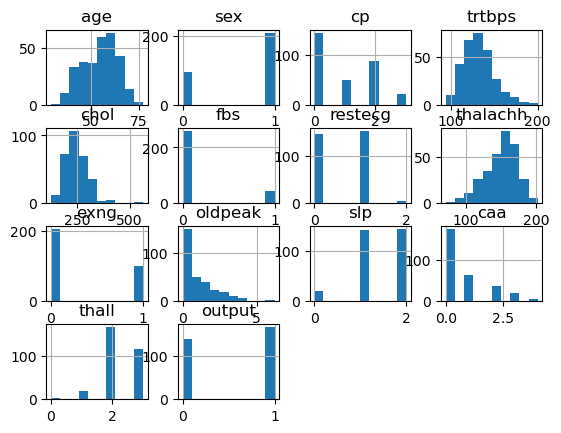

In [423]:
dataset.hist()

In [424]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [425]:
# Überprüfen der Nullwerte in den Daten
null_values = dataset.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


Die Übersicht zeigt, dass die Daten keine Null-Werte enthalten. Es ist somit nicht nötig für diesen Datensatz diese fehlenden Werte aufzufüllen.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='trtbps', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='fbs', ylabel='age'>,
        <Axes: xlabel='restecg', ylabel='age'>,
        <Axes: xlabel='thalachh', ylabel='age'>,
        <Axes: xlabel='exng', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slp', ylabel='age'>,
        <Axes: xlabel='caa', ylabel='age'>,
        <Axes: xlabel='thall', ylabel='age'>,
        <Axes: xlabel='output', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='cp', ylabel='sex'>,
        <Axes: xlabel='trtbps', ylabel='sex'>,
        <Axes: xlabel='chol', ylabel='sex'>,
        <Axes: xlabel='fbs', ylabel='sex'>,
        <Axes: xlabel='restecg', ylabel='sex'>,
        <Axes: xlabel='thalachh', ylabel='sex'

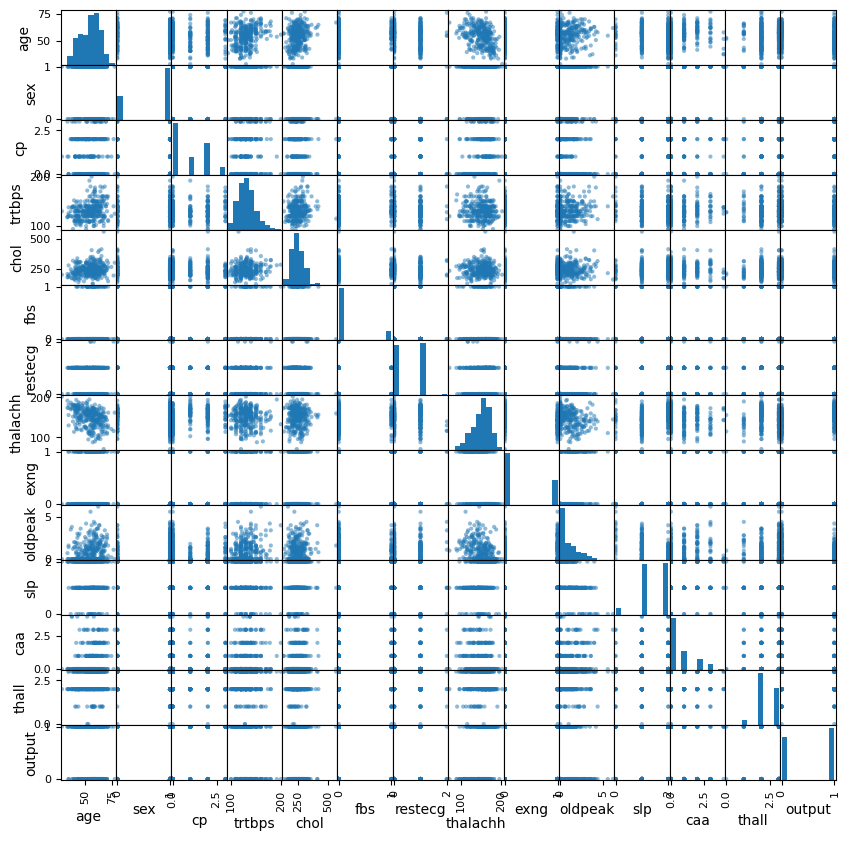

In [426]:
scatter_matrix(dataset.select_dtypes(include=['float64','int64']), figsize=(10,10))

<Axes: >

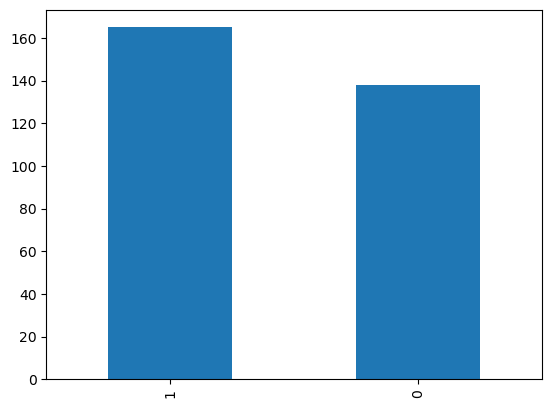

In [427]:
# Verteilung des Target Wertes
dataset["output"].value_counts().plot(kind="bar")

### Training

In [428]:
# Daten in Featues & Zielvariable aufteilen
X = dataset.drop('output', axis=1)  # Features
y = dataset['output']  # Zielvariable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelle initialisieren
gbt = GradientBoostingClassifier(random_state=42)

# Modelle trainieren
gbt.fit(X_train, y_train)

# Score des Modells bilden
score = gbt.score(X_test, y_test)

# Ausgabe Scores
print("Vorhersagegenauigkeit [GradientBoostingClassifier]: {:.2f}".format(score))

Vorhersagegenauigkeit [GradientBoostingClassifier]: 0.77


### Tuning der Hyperparamter

In [429]:
# Grid-Suche für die beste Hyperparameter-Kombinationen aus n_estimators und learning_rate
param_grid = {
    'n_estimators': [5,10,15,25,50,75,100,250,500],
    'learning_rate': [0.001,0.01,0.05,0.1,0.5,1,2,3]
}

grid_search = GridSearchCV(estimator=gbt, param_grid=param_grid, n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

best_params_1 = grid_search.best_params_
print("Beste Hyperparameter:", best_params_1)

Beste Hyperparameter: {'learning_rate': 0.1, 'n_estimators': 15}


In [430]:
# Grid-Suche für die beste Hyperparameter-Kombinationen aus max_depth
param_grid = {'max_depth':[2,3,4,5,6,7] }

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(**best_params_1, random_state=42), 
            param_grid=param_grid,n_jobs=-1, cv=5)
grid_search.fit(X_train,y_train)

best_params_2 = grid_search.best_params_
print("Bester Hyperparameter:", best_params_2)

Bester Hyperparameter: {'max_depth': 2}


In [431]:
# Modell erneut trainieren mit den besten Hyperparametern
gbt_best = GradientBoostingClassifier(**best_params_1, **best_params_2, random_state=42)
gbt_best.fit(X_train, y_train)

score = gbt_best.score(X_test, y_test)

# Evaluierung der Vorhersagegenauigkeit
print("Vorhersagegenauigkeit: {:.2f}".format(score))

Vorhersagegenauigkeit: 0.87


In [432]:
# Vorhersagen auf Basis der Trainingsdaten erstellen
train_predictions = gbt_best.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Vorhersagen auf Basis der Testdaten erstellen
test_predictions = gbt_best.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Vergleich Trainings und Test Accuracy
print("Training Accuracy:", train_accuracy)
print("Validation/Test Accuracy:", test_accuracy)


Training Accuracy: 0.859504132231405
Validation/Test Accuracy: 0.8688524590163934


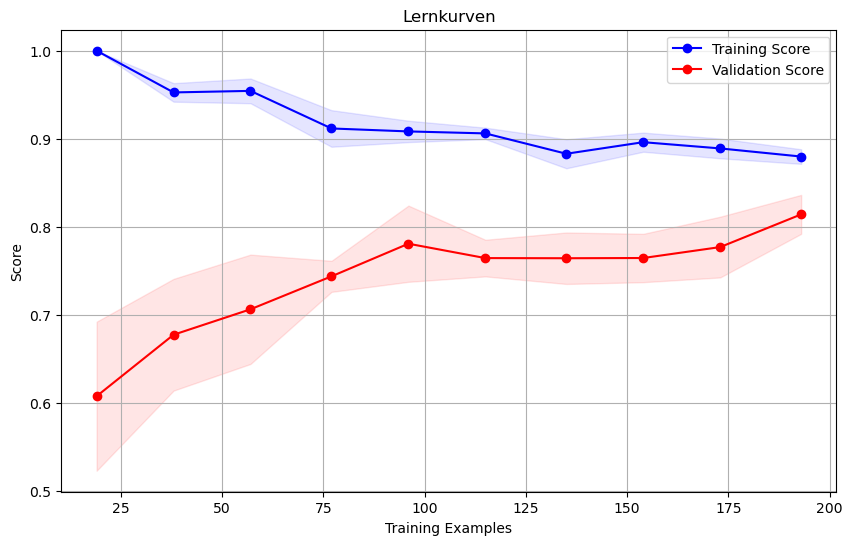

In [433]:
# Modell und Parameter definieren
train_sizes, train_scores, val_scores = learning_curve(gbt_best, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Berechnung von mean und std  der Trainings- und Testdaten
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Lernkurven plotten
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='red')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Lernkurven')
plt.legend(loc='best')
plt.grid(True)
plt.show()


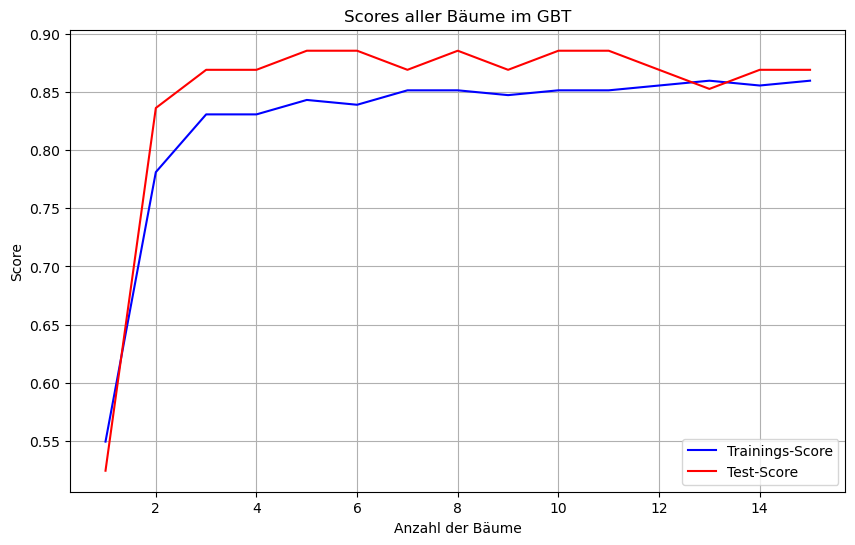

In [434]:
# Berechnen der Scores aller Bäume
train_scores = []
test_scores = []
for pred_train, pred_test in zip(gbt_best.staged_predict(X_train), gbt_best.staged_predict(X_test)):
    train_scores.append(accuracy_score(y_train, pred_train))
    test_scores.append(accuracy_score(y_test, pred_test))

# Plotten der Scores
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, gbt_best.n_estimators + 1), train_scores, 'b-', label='Trainings-Score')
plt.plot(np.arange(1, gbt_best.n_estimators + 1), test_scores, 'r-', label='Test-Score')
plt.xlabel('Anzahl der Bäume')
plt.ylabel('Score')
plt.title('Scores aller Bäume im GBT')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Visualisierung finaler GBT

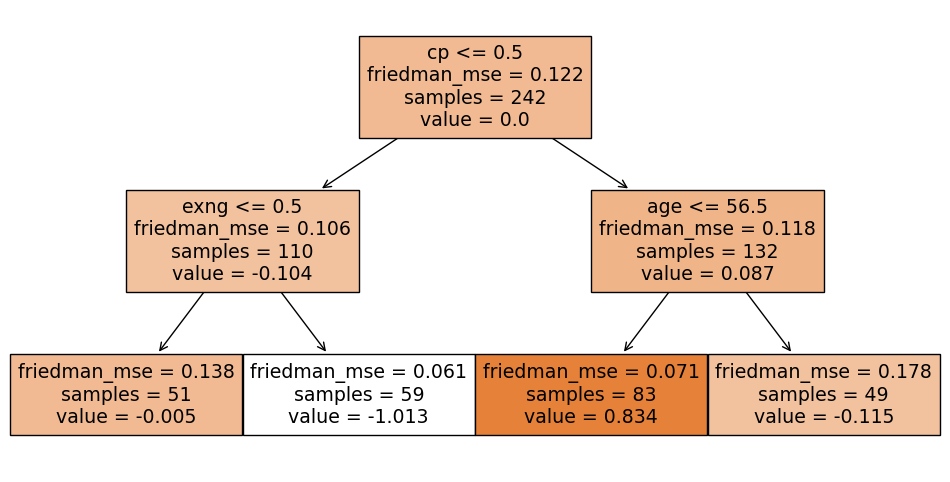

In [435]:
# Letzten Baum aus dem Gradient Boosted Tree Ensemble auswählen
tree = gbt_best.estimators_[gbt_best.n_estimators-1, 0] 

# Baum visualisieren
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()

## Quellenverzeichnis

1. Gradient Tree Boosting. 25 Mai 2023.\
   [https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting)

2. sklearn.model_selection.GridSearchCV. 27.Mai 2023.\
   [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

3. sklearn.ensemble.GradientBoostingClassifier. 26 Mai 2023.\
    [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

4. Praxiseinstieg Machine Learning mit Scikit-Learn, Keras und Tensorflow: Konzepte, Tools und Techniken für intelligente Systeme [2. Auflage]. Géron, A. 2020. dpunkt.verlag 

5. Heart Attack Analysis & Prediction Dataset.\
    [https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

6. Parameter Tuning. 27 Mai 2023.\
   [https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/](https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/)

7. Parameter Tuning For Gradient Boosting. 28 Mai 2023.\
   [https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae)